# Google Play Store Apps Case Study

### The Necessity of Data Visualisation
> "There are three kinds of lies: lies, damned lies, and statistics." **Mark Twain**

[Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) comprises four data sets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers and other influential observations on statistical properties. He described the article as being intended to counter the impression among statisticians that "numerical calculations are exact, but graphs are rough."

<img src="./images/anscombe's_quartet_data.png" width="500" height="500">

<img src="./images/misleading_statistics.png" width="800" height="400">

<img src="./images/anscombe's_quartet_visaulization.svg" width="800" height="800">

### Problem Statement

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?

### Import Data

**Data Source**

https://www.kaggle.com/lava18/google-play-store-apps

<img src='./images/datasrc.png' width='800' height='800'>

Kaggle API command to download the dataset
>`kaggle datasets download -d lava18/google-play-store-apps`

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
# Read the dataset and check its shape
data_path = './data/googleplaystore.csv'
df_orig = pd.read_csv(data_path)
df_orig.shape

(10841, 13)

In [3]:
# Read the first fifty rows
df_orig.head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [4]:
# Read the last fifty rows
df_orig.tail(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10791,Winter Wonderland,GAME,4.0,1287,38M,"50,000+",Free,0,Everyone,Word,"December 18, 2013",1.0,2.2 and up
10792,Soccer Clubs Logo Quiz,GAME,4.2,21661,16M,"1,000,000+",Free,0,Everyone,Trivia,"May 24, 2018",1.3.81,4.0 and up
10793,Sid Story,GAME,4.4,28510,78M,"500,000+",Free,0,Teen,Card,"August 1, 2018",2.6.6,4.0.3 and up
10794,PopStar,FAMILY,NaN,13,5.7M,"1,000+",Free,0,Everyone,Casual,"January 3, 2018",1.6,4.3 and up
10795,Reindeer VPN - Proxy VPN,TOOLS,4.2,7339,4.0M,"100,000+",Free,0,Everyone,Tools,"May 10, 2018",1.74,4.1 and up
10796,Inf VPN - Global Proxy & Unlimited Free WIFI VPN,TOOLS,4.7,61445,7.8M,"1,000,000+",Free,0,Everyone,Tools,"July 26, 2018",1.9.734,4.1 and up
10797,Fuel Rewards® program,LIFESTYLE,4.6,32433,46M,"1,000,000+",Free,0,Everyone,Lifestyle,"June 26, 2018",2.9.1,5.0 and up
10798,Word Search Tab 1 FR,FAMILY,NaN,0,1020k,50+,Paid,$1.04,Everyone,Puzzle,"February 6, 2012",1.1,3.0 and up
10799,Fr Daoud Lamei,SOCIAL,4.7,2036,6.8M,"100,000+",Free,0,Everyone,Social,"May 20, 2018",1.72,4.0.3 and up
10800,FR Roster,TOOLS,4.1,174,12M,"5,000+",Free,0,Everyone,Tools,"July 30, 2018",6.04,4.4 and up


### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column

In [5]:
# Print a summary of a DataFrame
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# Generate descriptive statistics
df_orig.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


#### Missing Value Treatment

In [7]:
# Check the number of null values in the columns
df_orig.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating

- Ratings is the target variable

In [8]:
# Percentage of null records in rating w.r.to total number of records
print("Precentage of null records in rating column: {:.2f}%".format(df_orig.Rating.isnull().sum()/df_orig.shape[0]*100))

Precentage of null records in rating column: 13.60%


- Imputing the null values in the target variable might bias the data analysis so we will drop these records

In [9]:
# Drop the records with null in rating
df = df_orig[~(df_orig.Rating.isnull())]
df.shape

(9367, 13)

In [10]:
# Another method
df = df_orig.dropna(subset=['Rating'])
df.shape

(9367, 13)

In [11]:
# Check the number of nulls in the dataframe again
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [12]:
# Inspect the nulls in the Android Version column
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
# Drop the shifted record
df = df[~((df['Android Ver'].isnull()) & (df.Category == '1.9'))]
df.shape

(9366, 13)

In [14]:
# Check the nulls in the Android Version column again
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [15]:
# Check the value counts for Android Version column
df['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
7.0 - 7.1.1              1
5.0 - 6.0                1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

In [16]:
# Since Android Version column is a categorical variable, let's check its mode "the most common value"
df['Android Ver'].mode()

0    4.1 and up
dtype: object

In [17]:
# Fill up the nulls in the Android Version column with the above value
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])

In [18]:
# Check the value counts for Android Version column again
df['Android Ver'].value_counts()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
7.0 - 7.1.1              1
5.0 - 6.0                1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

In [19]:
# Check the dataframe again for null values to cross-verify
print(df.shape)
df.isnull().sum()

(9366, 13)


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [20]:
# Check the records where the current version is null
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [21]:
# Check the value counts for Current Version column
df['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
6.0.18                   1
1.0beta                  1
10.8.1.330               1
1.084                    1
v6.1                     1
Name: Current Ver, Length: 2638, dtype: int64

In [22]:
# Since the Current Version column is a categorical variable, let's check it's mode
df['Current Ver'].mode()[0]

'Varies with device'

In [23]:
# Fill up the null values in the Current Version column with it's mode
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].mode()[0])

In [24]:
# Check the value counts for Current Version column again
df['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
6.0.18                   1
1.0beta                  1
10.8.1.330               1
1.084                    1
v6.1                     1
Name: Current Ver, Length: 2638, dtype: int64

In [25]:
# Check the dataframe again for null values to cross-verify
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [26]:
# Print the summary of the dataframe again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


#### Handling Incorrect Data Types

In [27]:
# Generate Descriptive Statistics
df.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [28]:
# Print a summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


The following types are of object dtype while they should be numerical:

- Reviews (Should be Integer)
- Size (Should be Float)
- Installs (Should be Integer)
- Price (Should be Float)

In [29]:
# Checking Price column
df.Price.value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$2.95         1
$1.59         1
$2.50         1
$1.76         1
$389.99       1
Name: Price, Length: 73, dtype: int64

In [30]:
# Check that all non-zero values in Price column starts with '$'
df.Price.shape[0] == df.Price.str.startswith('$').sum() + df.Price[df.Price == '0'].count()

True

In [31]:
# Get rid of '$' and change the type to float64
df.Price = df.Price.apply(lambda x: float(x.replace('$','')))

In [32]:
# Generate Descriptive Statistics to cross-verify
print(df.Price.dtype)
df.describe()

float64


,Rating,Price
count,9366.000000,9366.000000
mean,4.191757,0.960928
std,0.515219,15.816585
min,1.000000,0.000000
25%,4.000000,0.000000
50%,4.300000,0.000000
75%,4.500000,0.000000
max,5.000000,400.000000


In [33]:
# Check Reviews column
df.Reviews.value_counts()

2          83
3          78
5          74
4          74
1          67
           ..
118439      1
6271        1
349503      1
903392      1
4064868     1
Name: Reviews, Length: 5992, dtype: int64

In [34]:
# Make sure all values are digits
df.Reviews.str.isdigit().sum() == df.Reviews.shape[0]

True

In [35]:
# Change the dtype of Reveiws column to be int64
df.Reviews = df.Reviews.astype('int64')

In [36]:
# Generate Descriptive Statistics to cross-verify
print(df.Reviews.dtype)
df.describe()

int64


,Rating,Reviews,Price
count,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,0.960928
std,0.515219,3.144042e+06,15.816585
min,1.000000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,0.000000
50%,4.300000,5.930500e+03,0.000000
75%,4.500000,8.153275e+04,0.000000
max,5.000000,7.815831e+07,400.000000


In [37]:
# Check Installs column
df.Installs.value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [38]:
# Get rid of ',' & '+' and change the type to int64
df.Installs = df.Installs.apply(lambda x: int(x.replace(',','').replace('+','')))

In [39]:
# Generate Descriptive Statistics to cross-verify
print(df.Installs.dtype)
df.describe()

int64


,Rating,Reviews,Installs,Price
count,9366.000000,9.366000e+03,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,1.789744e+07,0.960928
std,0.515219,3.144042e+06,9.123822e+07,15.816585
min,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [40]:
# Check Size column
df.Size.value_counts()

Varies with device    1637
14M                    166
12M                    161
11M                    160
15M                    159
                      ... 
499k                     1
25k                      1
411k                     1
756k                     1
696k                     1
Name: Size, Length: 414, dtype: int64

In [41]:
# Define function to fix size - convert all values to KB
def fix_size(x):
    if x[-1] == 'M':
        x = float(x[:-1])*10**3
    elif x[-1] == 'k':
        x = float(x[:-1])
    else:
        x = None # Varies with device replaced with Null
    return x

In [42]:
# Fix Size column
df.Size = df.Size.apply(lambda x: fix_size(x))
df.Size.dtype

dtype('float64')

In [43]:
# Percentage of null records in Size w.r.to total number of records
print("Precentage of null records in Size column: {:.2f}%".format(df.Size.isnull().sum()/df.shape[0]*100))

Precentage of null records in Size column: 17.48%


In [44]:
# Check mean value for Size column
round(df.Size.mean(),0)

22958.0

In [45]:
# Impute the null values in Size columns with the mean value
df.Size = df.Size.fillna(round(df.Size.mean(),0))

In [46]:
# Check Size column for cross-verify
df.Size.value_counts()

22958.0    1637
14000.0     166
12000.0     161
11000.0     160
15000.0     159
           ... 
837.0         1
930.0         1
812.0         1
809.0         1
143.0         1
Name: Size, Length: 413, dtype: int64

In [47]:
# Generate Descriptive Statistics to cross-verify
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,9.366000e+03,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,22957.675582,1.789744e+07,0.960928
std,0.515219,3.144042e+06,21298.008689,9.123822e+07,15.816585
min,1.000000,1.000000e+00,8.500000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [48]:
# Print a summary for cross-verify
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.

In [49]:
# Perform sanity checks on the Rating column
df.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [50]:
# Perform sanity checks on the Reviews column
df[df.Reviews > df.Installs].shape

(7, 13)

In [51]:
# Check these applications
df[df.Reviews > df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,22958.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [52]:
# Drop these records
df = df[df.Reviews <= df.Installs]
df.shape

(9359, 13)

In [53]:
# Perform sanity checks on Free apps
df[df.Type == 'Free'].Price.value_counts()

0.0    8715
Name: Price, dtype: int64

#### Outliers Analysis Using Boxplot

Now we need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where we’ll start utilising visualisation to achieve our tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable.


Using a box plot you can identify the outliers as follows:

<img src='./images/Boxplot.png' alt='BoxPlots to Identify Outliers'>

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

In [54]:
# Import the plotting libraries
import matplotlib.pyplot as plt

%matplotlib inline

In [55]:
# Generate descriptive statistics
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9359.000000,9.359000e+03,9359.000000,9.359000e+03,9359.000000
mean,4.191174,5.144332e+05,22962.745112,1.791083e+07,0.961116
std,0.514966,3.145187e+06,21304.184133,9.127102e+07,15.822478
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,1.870000e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.960000e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.164100e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


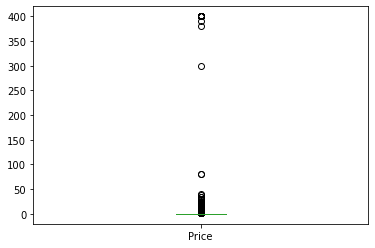

In [56]:
# Create a box plot for Price column using pandas dataframe
df.Price.plot.box()
plt.show()

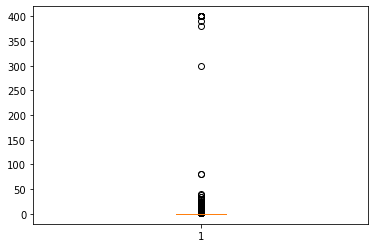

In [57]:
# Create a box plot for Price column using matplotlib
plt.boxplot(df.Price)
plt.show()

In [58]:
# Check the apps with price more than 100
df[df.Price > 100]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [59]:
# Let's remove the outliers > 100
df = df[df.Price <= 100]
df.shape

(9344, 13)

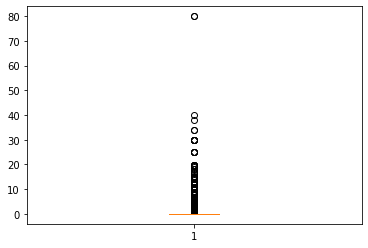

In [60]:
# Now let's plot the price column again
plt.boxplot(df.Price)
plt.show()

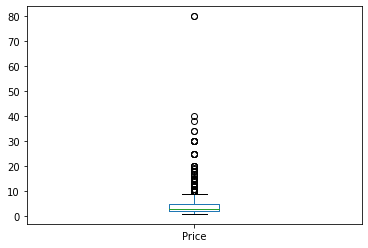

In [61]:
# Let's plot the price column for the paid apps
df[df.Price > 0].Price.plot.box()
plt.show()

In [62]:
# Let's check the apps with price more than 10
df[df.Price > 10]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2251,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2921,25000.0,100000,Paid,24.99,Everyone,Medical,"May 25, 2018",2018.5.47,5.0 and up
2252,Essential Anatomy 3,MEDICAL,4.1,1533,42000.0,50000,Paid,11.99,Mature 17+,Medical,"August 7, 2014",1.1.3,4.0.3 and up
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2254,EMT Review Plus,MEDICAL,4.5,199,1800.0,10000,Paid,11.99,Everyone,Medical,"June 27, 2018",3.0.5,4.4W and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3800.0,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
2261,Block Buddy,MEDICAL,4.0,15,5000.0,1000,Paid,14.99,Everyone,Medical,"August 1, 2018",7.6.14,4.0 and up
2266,EMT PASS,MEDICAL,3.4,51,2400.0,1000,Paid,29.99,Everyone,Medical,"October 22, 2014",2.0.2,4.0 and up
2269,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.4,8,6500.0,100,Paid,12.99,Everyone,Medical,"July 25, 2018",7,3.0 and up
2272,AnatomyMapp,MEDICAL,4.1,80,48000.0,5000,Paid,14.99,Everyone,Medical,"November 5, 2013",1.0,3.0 and up
2277,"Muscle Premium - Human Anatomy, Kinesiology, B...",MEDICAL,4.2,168,25000.0,10000,Paid,24.99,Everyone,Medical,"August 11, 2017",7.1.17,4.4 and up


In [63]:
# Can we drop records price > 10
df[df.Price > 10].describe()

,Rating,Reviews,Size,Installs,Price
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,4.229091,1052.454545,22822.763636,17047.818182,21.678909
std,0.471276,2027.782568,22714.077656,31946.719109,13.612267
min,2.900000,1.000000,266.000000,10.000000,10.990000
25%,4.000000,16.000000,3800.000000,1000.000000,14.495000
50%,4.300000,80.000000,20000.000000,1000.000000,16.990000
75%,4.600000,996.000000,31500.000000,10000.000000,24.990000
max,5.000000,8450.000000,100000.000000,100000.000000,79.990000


In [64]:
# Can we drop records with price > 10
df[df.Price <= 10].describe()

,Rating,Reviews,Size,Installs,Price
count,9289.000000,9.289000e+03,9289.000000,9.289000e+03,9289.000000
mean,4.191474,5.183027e+05,22986.275649,1.804568e+07,0.208083
std,0.515267,3.156699e+06,21301.814823,9.160104e+07,0.972313
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,1.940000e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,6.148000e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.348800e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,10.000000


In [65]:
# We decided to get rid of these outliers as well
df = df[df.Price <= 10]
df.shape

(9289, 13)

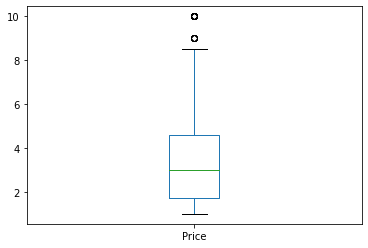

In [66]:
# Let's plot the price column for the paid apps again
df[df.Price > 0].Price.plot.box()
plt.show()

#### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


<img src='images\Histogram.png' alt='Histogram'>

You can adjust the number of bins to improve its granularity

<img src='images\Granular.png' alt='Bins Change'>

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

In [67]:
# Let's see the statistics before plotting
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9289.000000,9.289000e+03,9289.000000,9.289000e+03,9289.000000
mean,4.191474,5.183027e+05,22986.275649,1.804568e+07,0.208083
std,0.515267,3.156699e+06,21301.814823,9.160104e+07,0.972313
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,1.940000e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,6.148000e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.348800e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,10.000000


In [68]:
# Show the Reviews value counts
df.Reviews.value_counts()

2         81
3         78
5         74
4         72
1         65
          ..
47386      1
624924     1
33053      1
4383       1
739329     1
Name: Reviews, Length: 5977, dtype: int64

In [69]:
np.linspace(df.Reviews.min(),df.Reviews.max(),10)

array([1.00000000e+00, 8.68425711e+06, 1.73685132e+07, 2.60527693e+07,
       3.47370254e+07, 4.34212816e+07, 5.21055377e+07, 6.07897938e+07,
       6.94740499e+07, 7.81583060e+07])

(array([9.163e+03, 8.100e+01, 1.900e+01, 9.000e+00, 0.000e+00, 5.000e+00,
        0.000e+00, 3.000e+00, 7.000e+00, 2.000e+00]),
 array([1.00000000e+00, 7.81583150e+06, 1.56316620e+07, 2.34474925e+07,
        3.12633230e+07, 3.90791535e+07, 4.68949840e+07, 5.47108145e+07,
        6.25266450e+07, 7.03424755e+07, 7.81583060e+07]),
 <BarContainer object of 10 artists>)

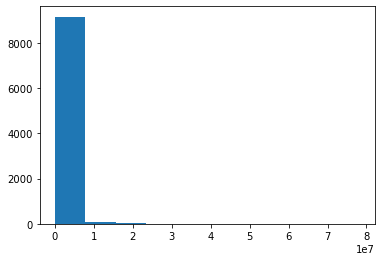

In [70]:
# Create a histogram for the Reviews
plt.hist(df.Reviews)

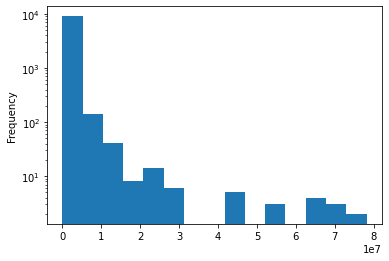

In [71]:
# Change number of bins and use logarithmic scale
df.Reviews.plot.hist(bins=15, log=True);

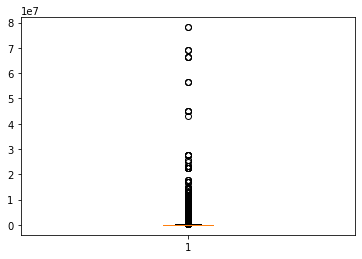

In [72]:
# Create a boxplot of the reviews columns
plt.boxplot(df.Reviews);

In [73]:
# Let's check the apps with more than 1M reviews
df[df.Reviews >= 1000000].sort_values('Reviews')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1671,Kick the Buddy,GAME,4.3,1000417,22958.0,50000000,Free,0.0,Teen,Action,"July 5, 2018",Varies with device,4.4 and up
1760,Kick the Buddy,GAME,4.3,1000417,22958.0,50000000,Free,0.0,Teen,Action,"July 5, 2018",Varies with device,4.4 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
1929,Kick the Buddy,GAME,4.3,1003269,22958.0,50000000,Free,0.0,Teen,Action,"July 5, 2018",Varies with device,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,22958.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,22958.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,22958.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,22958.0,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


In [74]:
# Since the above records belong to famous applications already, let's drop them
df = df[df.Reviews < 1000000]
df.shape

(8585, 13)

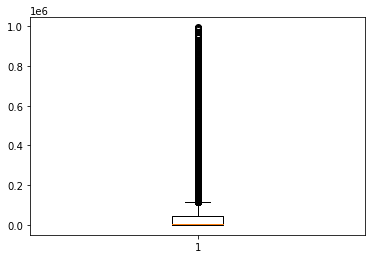

In [75]:
# Check boxplot again
plt.boxplot(df.Reviews);

(array([7119.,  521.,  314.,  169.,  127.,  114.,   69.,   49.,   55.,
          48.]),
 array([1.000000e+00, 9.950110e+04, 1.990012e+05, 2.985013e+05,
        3.980014e+05, 4.975015e+05, 5.970016e+05, 6.965017e+05,
        7.960018e+05, 8.955019e+05, 9.950020e+05]),
 <BarContainer object of 10 artists>)

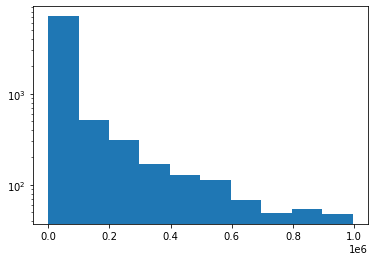

In [76]:
# Check histogram again
plt.hist(df.Reviews, log=True)

In [77]:
# Check Installs column statistics
df.Installs.describe()

count    8.585000e+03
mean     4.312905e+06
std      2.872633e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [78]:
# Check Installs column value counts
df.Installs.value_counts()

1000000       1577
10000000      1177
100000        1143
10000          994
5000000        752
1000           688
500000         538
50000          462
5000           426
100            302
500            199
50000000       138
10              64
50              56
100000000       51
5                8
1000000000       5
500000000        5
Name: Installs, dtype: int64

(array([8.575e+03, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00]),
 array([5.00000000e+00, 1.00000004e+08, 2.00000004e+08, 3.00000004e+08,
        4.00000003e+08, 5.00000002e+08, 6.00000002e+08, 7.00000002e+08,
        8.00000001e+08, 9.00000000e+08, 1.00000000e+09]),
 <BarContainer object of 10 artists>)

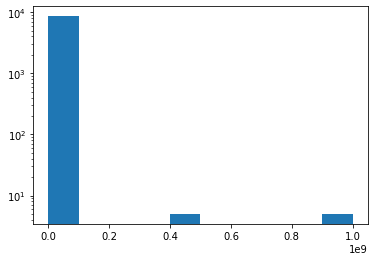

In [79]:
# Let's create a histogram for Installs column
plt.hist(df.Installs, log=True)

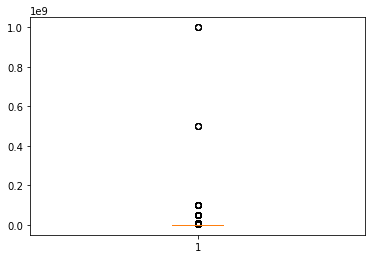

In [80]:
# Let's create a boxplot for the installs column
plt.boxplot(df.Installs);

In [81]:
# Let's drop the values > 100M
df = df[df.Installs <= 100000000]
df.shape

(8575, 13)

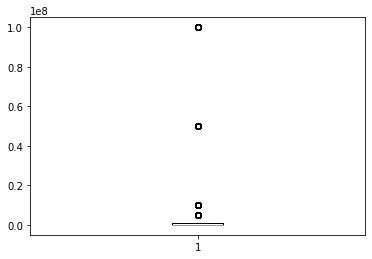

In [82]:
# Let's create a boxplot for Installs again
plt.boxplot(df.Installs);

(array([8386.,    0.,    0.,    0.,  138.,    0.,    0.,    0.,    0.,
          51.]),
 array([5.00000000e+00, 1.00000045e+07, 2.00000040e+07, 3.00000035e+07,
        4.00000030e+07, 5.00000025e+07, 6.00000020e+07, 7.00000015e+07,
        8.00000010e+07, 9.00000005e+07, 1.00000000e+08]),
 <BarContainer object of 10 artists>)

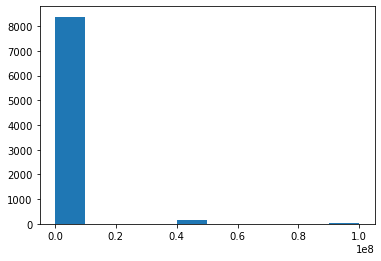

In [83]:
# Let's drop the histogram for Installs again
plt.hist(df.Installs)

In [84]:
# Let's drop the values > 20M
df = df[df.Installs <= 20000000]
df.shape

(8386, 13)

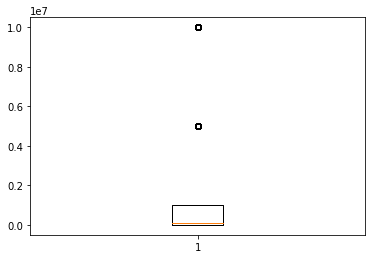

In [85]:
# Let's create a boxplot for Installs again
plt.boxplot(df.Installs);

In [86]:
# Let's check the size column
df.Size.describe()

count      8386.000000
mean      21758.779215
std       20784.631977
min           8.500000
25%        5900.000000
50%       18000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

(array([3184., 1327., 2094.,  554.,  405.,  262.,  177.,  123.,  106.,
         154.]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]),
 <BarContainer object of 10 artists>)

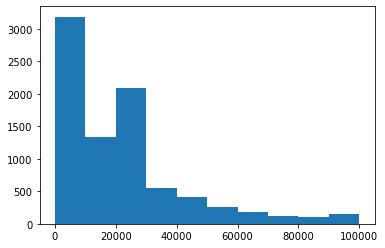

In [87]:
# Plot histogram for Size
plt.hist(df.Size)

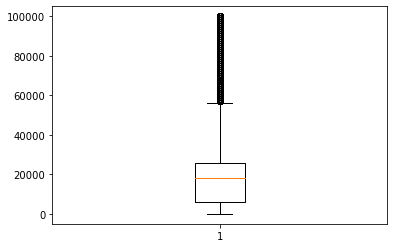

In [88]:
# Plot boxplot for Size
plt.boxplot(df.Size);

### Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes

In [89]:
# Import required libraries
import seaborn as sns

#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

<img src='images\Distplot.png' alt='Distplot'>

We'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

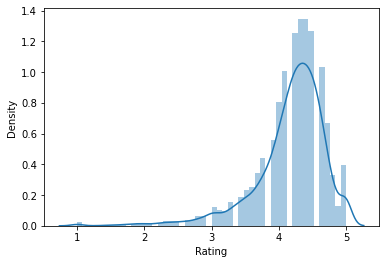

In [90]:
# Create a distribution plot for Rating
sns.distplot(df.Rating);

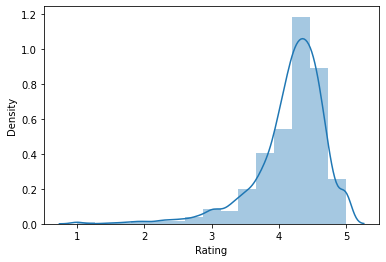

In [91]:
# Change the number of bins
sns.distplot(df.Rating, bins=15);

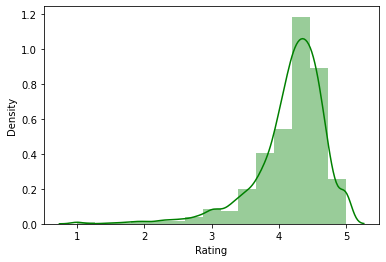

In [92]:
# Change the color of bins to green
sns.distplot(df.Rating, bins=15, color='g');

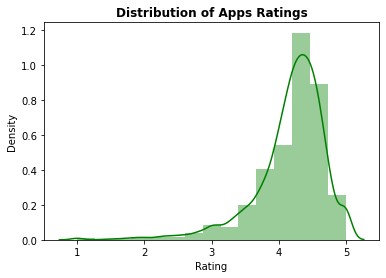

In [93]:
# Apply Matplotlib functionalities
sns.distplot(df.Rating, bins=15, color='g')
plt.title('Distribution of Apps Ratings', fontsize=12, fontweight='bold');
#plt.show()

#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

In [94]:
# Check all styling options
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

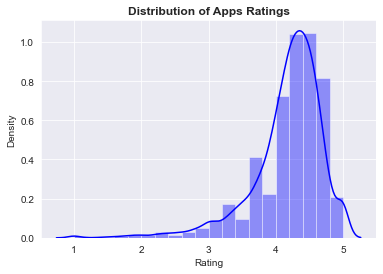

In [95]:
# Change the number of bins to 20 and use different style using sns
# style must be one of white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')
sns.distplot(df.Rating, bins=20, color='b')
plt.title('Distribution of Apps Ratings', fontsize=12, fontweight='bold')
plt.show()

In [96]:
# Reset plot style to default
plt.style.use('default')

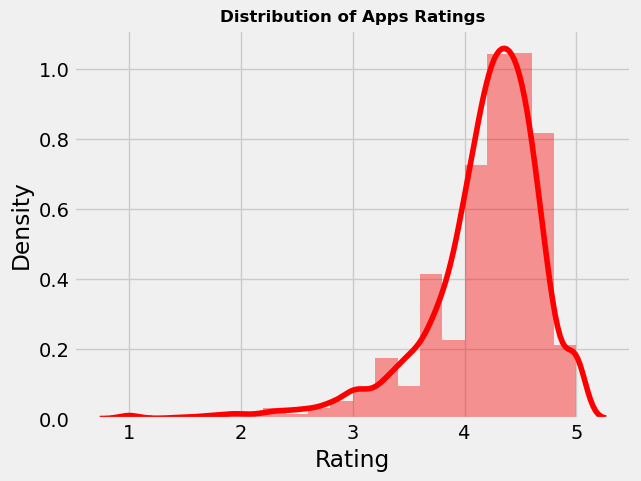

In [97]:
# Use different style using matplotlib
plt.style.use('fivethirtyeight')
sns.distplot(df.Rating, bins=20, color='r')
plt.title('Distribution of Apps Ratings', fontsize=12, fontweight='bold')
plt.show()

In [98]:
# Reset plot style to default
plt.style.use('default')

#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a bar chart

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

<img src='images\pie.png' alt='Pie Chart'>

<img src='images\bar.png' alt='Bar Chart'>

- We'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

  lab  val
0   A   10
1   B   30
2   C   20


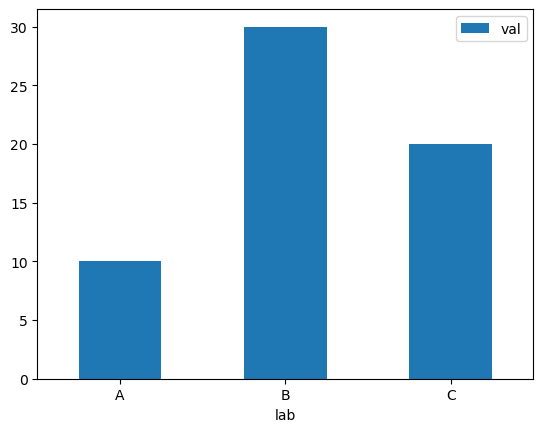

In [99]:
# Example for bar chart
df_example = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
print(df_example)
ax = df_example.plot.bar(x='lab', y='val', rot=0)

     val
lab     
A     10
B     30
C     20


<AxesSubplot:ylabel='val'>

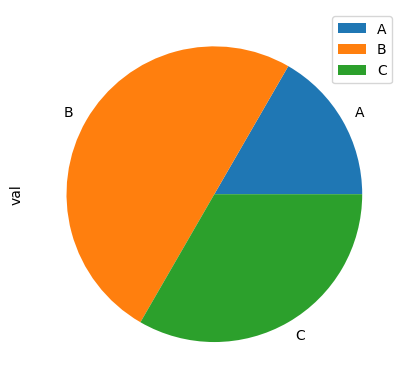

In [100]:
# Example for pie chart
df_example.set_index('lab',inplace=True)
print(df_example)
df_example.plot.pie(y='val')

In [101]:
# Print summary to our data again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8386 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8386 non-null   object 
 1   Category        8386 non-null   object 
 2   Rating          8386 non-null   float64
 3   Reviews         8386 non-null   int64  
 4   Size            8386 non-null   float64
 5   Installs        8386 non-null   int64  
 6   Type            8386 non-null   object 
 7   Price           8386 non-null   float64
 8   Content Rating  8386 non-null   object 
 9   Genres          8386 non-null   object 
 10  Last Updated    8386 non-null   object 
 11  Current Ver     8386 non-null   object 
 12  Android Ver     8386 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 917.2+ KB


In [102]:
# Reset the index
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8386 entries, 0 to 8385
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8386 non-null   object 
 1   Category        8386 non-null   object 
 2   Rating          8386 non-null   float64
 3   Reviews         8386 non-null   int64  
 4   Size            8386 non-null   float64
 5   Installs        8386 non-null   int64  
 6   Type            8386 non-null   object 
 7   Price           8386 non-null   float64
 8   Content Rating  8386 non-null   object 
 9   Genres          8386 non-null   object 
 10  Last Updated    8386 non-null   object 
 11  Current Ver     8386 non-null   object 
 12  Android Ver     8386 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 851.8+ KB


In [103]:
# Analyse the Content Rating column
df['Content Rating'].value_counts()

Everyone           6743
Teen                895
Mature 17+          414
Everyone 10+        330
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [104]:
# Drop the rows which are less represented
df = df[~(df['Content Rating'].isin(['Adults only 18+', 'Unrated']))]
df['Content Rating'].value_counts()

Everyone        6743
Teen             895
Mature 17+       414
Everyone 10+     330
Name: Content Rating, dtype: int64

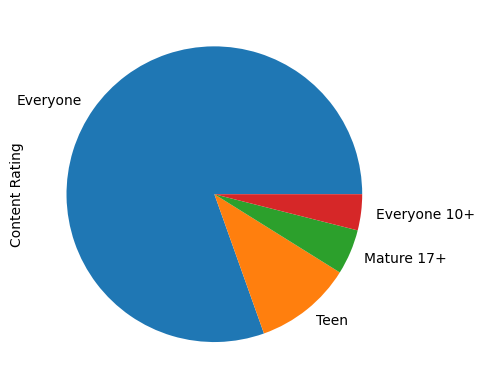

In [105]:
# Plot a pie chart for Content Rating value counts
df['Content Rating'].value_counts().plot.pie();

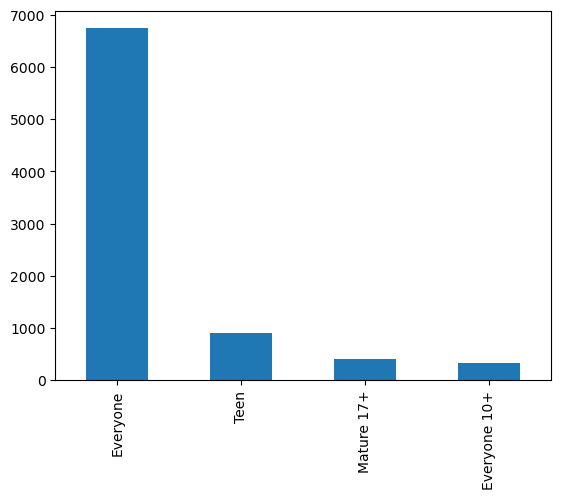

In [106]:
# Plot a vertical bar chart for Content Rating value counts
df['Content Rating'].value_counts().plot.bar();

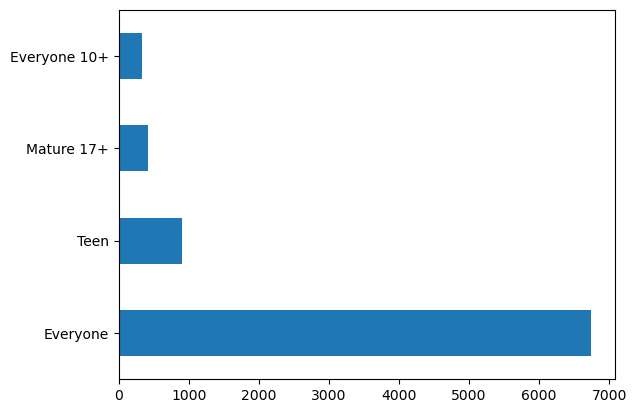

In [107]:
# Plot a horizontal bar chart for Content Rating value counts
df['Content Rating'].value_counts().plot.barh();

<AxesSubplot:>

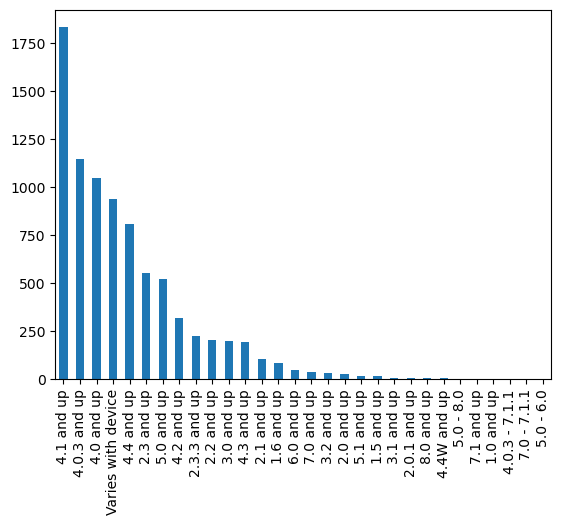

In [108]:
# Plot a bar plot for checking Android version
df['Android Ver'].value_counts().plot.bar()

#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations we can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and we can generally deduce some sort of trends in the data with the help of a scatter plot. 

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

<img src='images\regression3.png' alt='Scatterplot-Reg'>

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

<img src='images\Clusters.png' alt='Scatter-Clusters'>

We'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

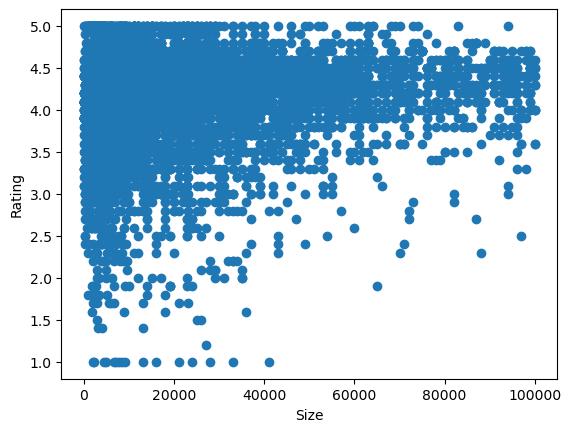

In [109]:
# Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(df.Size, df.Rating)
plt.xlabel('Size')
plt.ylabel('Rating')
plt.show()

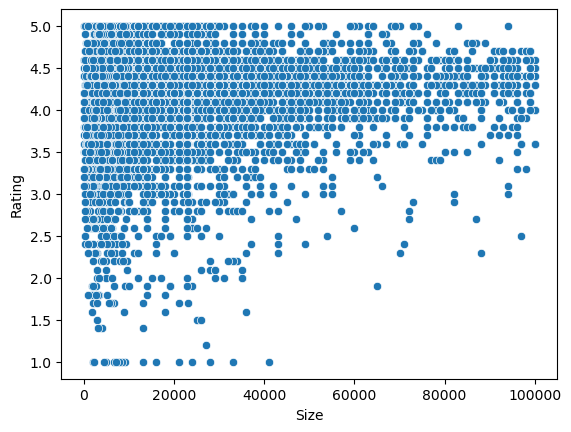

In [110]:
# Scatterplot using Seaborn
sns.scatterplot(df.Size, df.Rating)
plt.show()

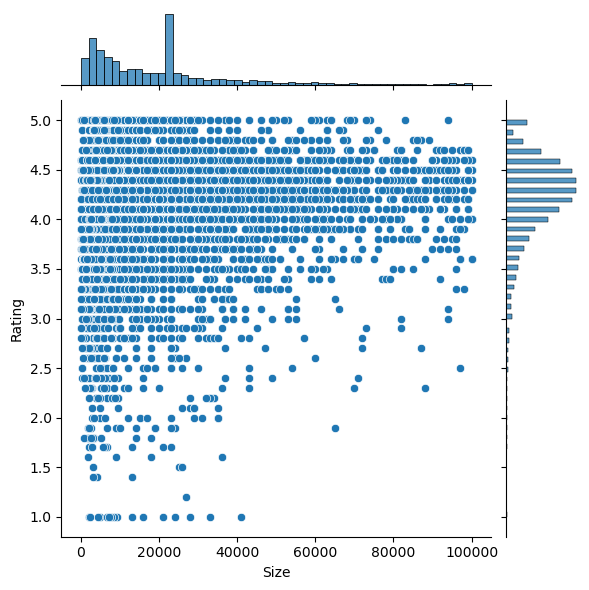

In [111]:
# Plot the same thing now using a jointplot
#import scipy.stats as stats
sns.jointplot(df.Size, df.Rating)
plt.show()

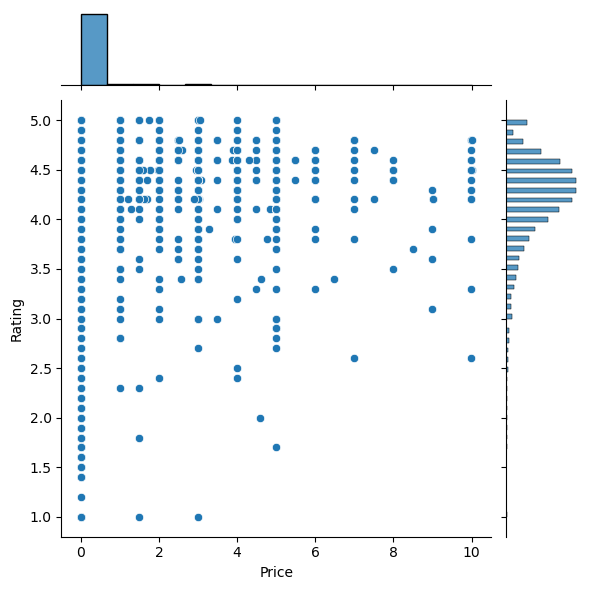

In [112]:
# Plot a jointplot for Price and Rating
sns.jointplot(df.Price, df.Rating)
plt.show()

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

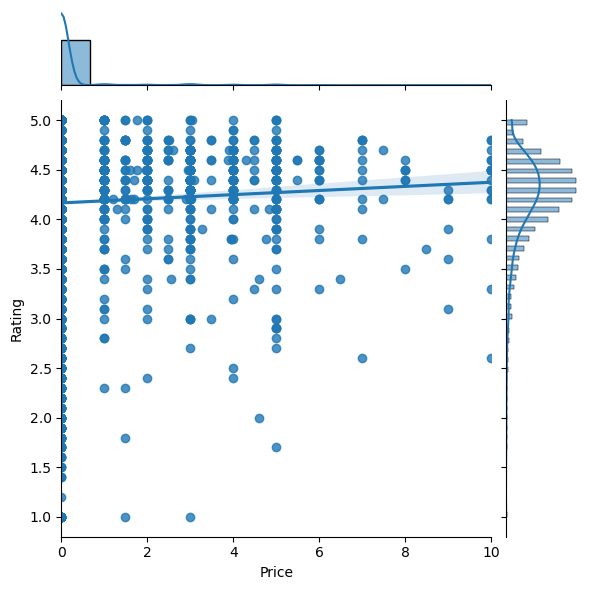

In [113]:
# Plot a reg plot for Price and Rating and observe the trend
sns.jointplot(df.Price, df.Rating, kind='reg')
plt.show()

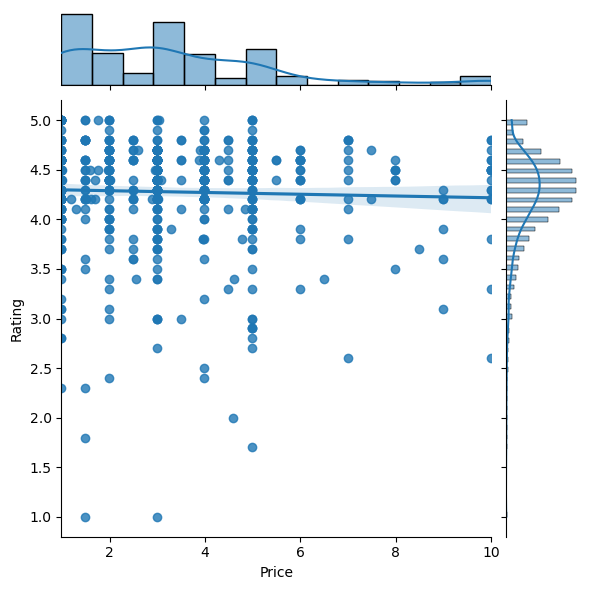

In [114]:
# Plot a reg plot for Price and Rating for only paid apps
sns.jointplot(df[df.Price > 0].Price, df.Rating, kind='reg')
plt.show()

**Pair Plots**

 - When we have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

<img src='images\pairplots2.png' alt='Pairplots'>

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

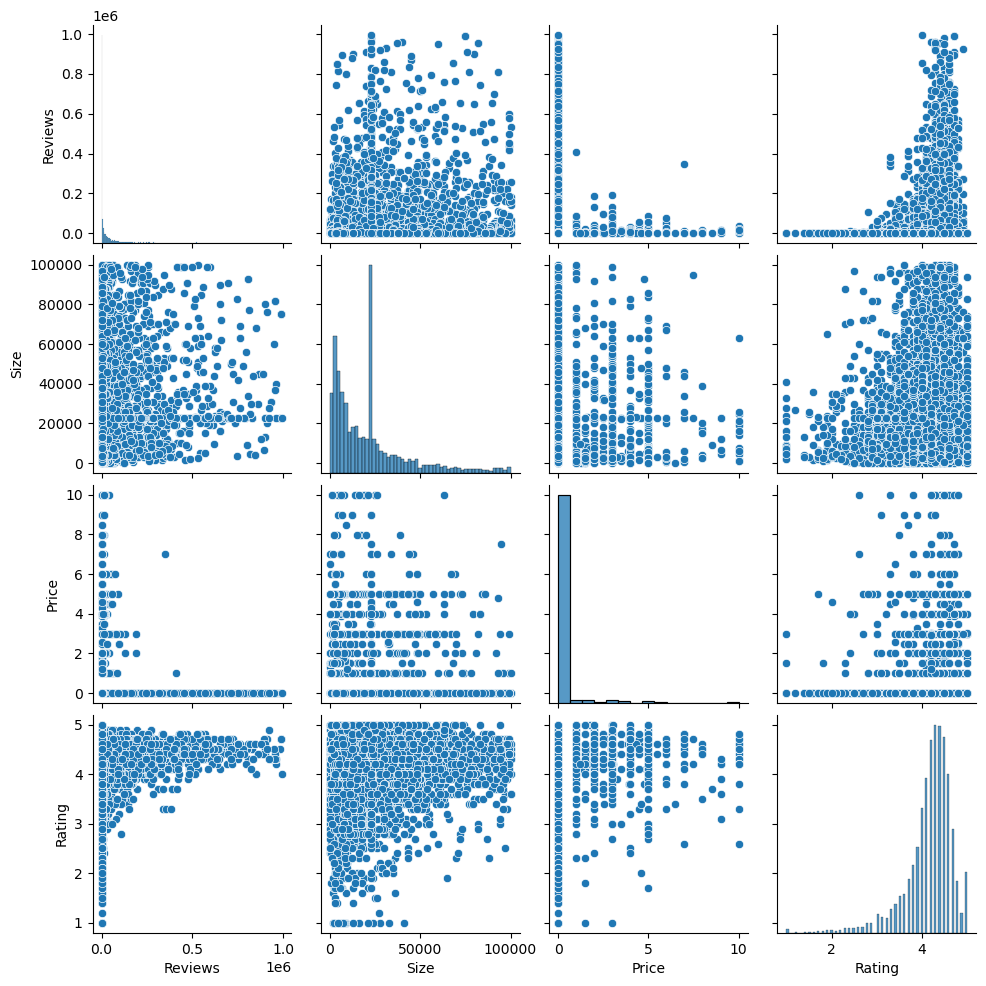

In [115]:
# Create a pair plot for Reviews, Size, Price and Rating
sns.pairplot(df[['Reviews', 'Size', 'Price', 'Rating']])
plt.show()

**Bar Charts Revisited**

- Here, we'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- We can modify the **estimator** parameter to change the aggregation value of your barplot

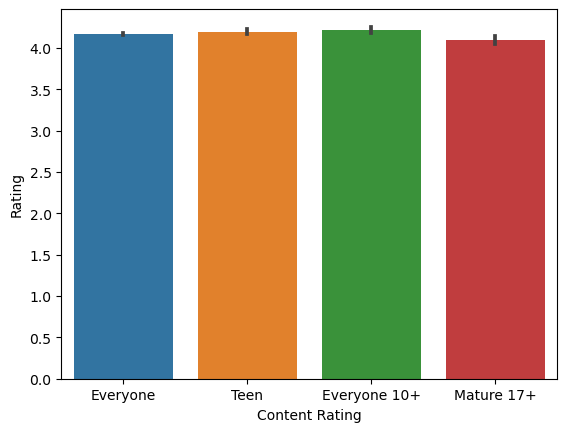

In [116]:
##Plot a bar plot of Content Rating vs Average Rating 
sns.barplot(x=df['Content Rating'], y=df.Rating)
plt.show()

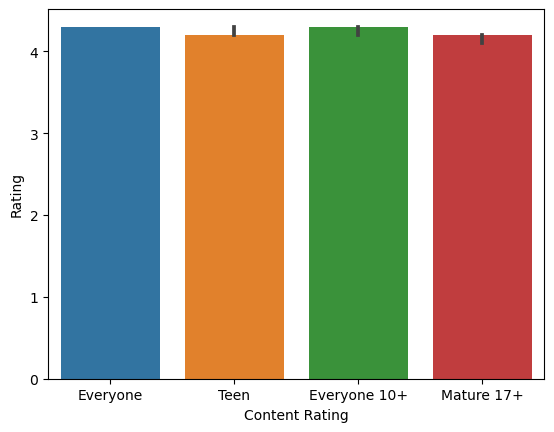

In [117]:
# Plot the bar plot again with Median Rating
sns.barplot(x=df['Content Rating'], y=df.Rating, estimator=np.median)
plt.show()

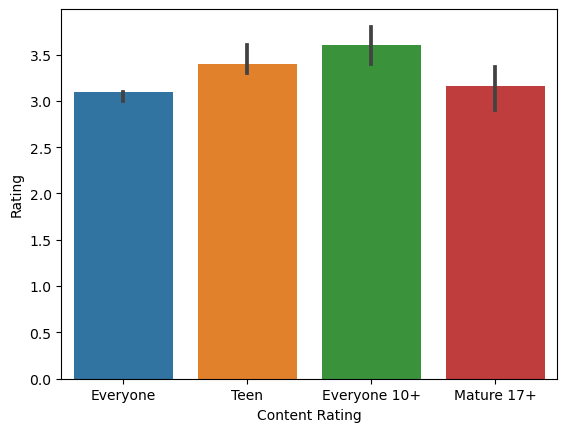

In [118]:
# Plot the bar plot with only the 5th percentile of Ratings
sns.barplot(x=df['Content Rating'], y=df.Rating, estimator=lambda x: np.quantile(x,0.05))
plt.show()

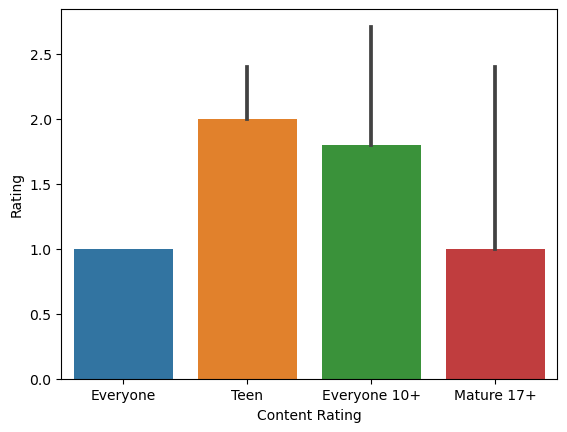

In [119]:
# Plot the bar plot with the minimum Rating
sns.barplot(x=df['Content Rating'], y=df.Rating, estimator=np.min)
plt.show()

__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html

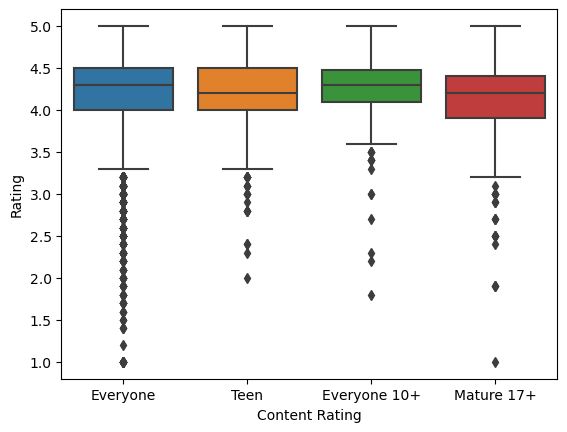

In [120]:
# Plot a box plot of Rating vs Content Rating
sns.boxplot(df['Content Rating'],df.Rating)
plt.show()

#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

<img src='images\heatmap1.png' alt='HeatMap'>

- In python, we can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

<img src='images\heatmap2.png' alt='heatmap2'>

- We'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [121]:
# Ratings vs Size vs Content Rating

# Prepare buckets for the Size column using pd.qcut

df['Size Bucket'] = pd.qcut(df.Size, [0,0.2,0.4,0.6,0.8,1], ['VL','L','M','H','VH'])
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,L


In [122]:
# Create a pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(data=df, index='Content Rating', columns='Size Bucket', values='Rating')

Size Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.116849,4.158037,4.212327,4.166455,4.184233
Everyone 10+,4.188889,4.207143,4.244762,4.181034,4.215702
Mature 17+,3.951429,4.129592,4.020611,4.162500,4.187234
Teen,4.225000,4.208633,4.140351,4.177528,4.244483


In [123]:
# Change the aggregation to 20th percentile
pd.pivot_table(data=df, index='Content Rating', columns='Size Bucket', values='Rating', aggfunc=lambda x: np.quantile(x,0.2))

Size Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.80,3.9
Everyone 10+,3.84,3.94,4.1,3.94,4.0
Mature 17+,3.28,3.64,3.7,3.90,4.0
Teen,3.90,3.86,3.9,4.00,4.0


In [124]:
# Store the pivot table in a separate variable
result = pd.pivot_table(data=df, index='Content Rating', columns='Size Bucket', values='Rating', aggfunc=lambda x: np.quantile(x,0.2))

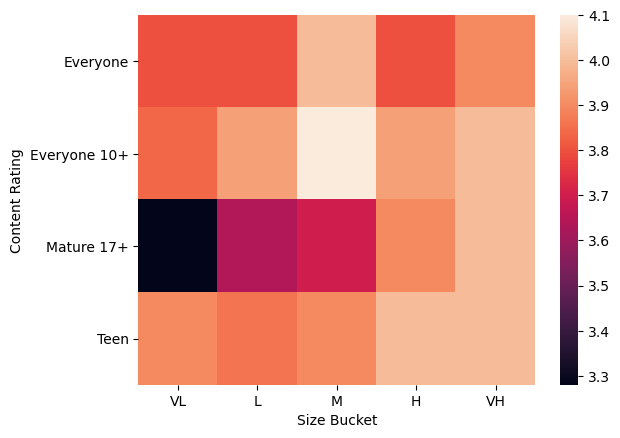

In [125]:
# Plot a heat map
sns.heatmap(result)
plt.show()

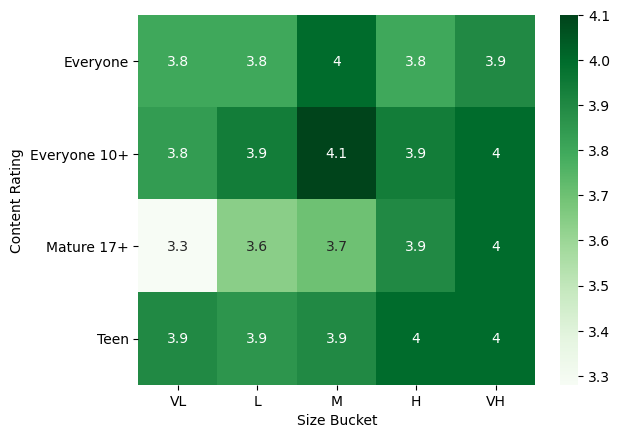

In [126]:
# Apply customisations
sns.heatmap(result, cmap='Greens', annot=True)
plt.show()